In [14]:
import pandas as pd
import seaborn as sns
import os

In [18]:
df = pd.read_excel("Case study Datasets.xlsx",sheet_name="Sales Data")

In [19]:
df.columns

Index(['Store', 'Month_Year', 'Year', 'Brand', 'Brakes_Sales', 'Exhaust_Sales',
       'Other_Tires_Sales', 'Retail_Tire_Sales', 'Tire_Shocks_Sales',
       'Tire_Services_Sales', 'Tire_Wiper_Sales', 'Brakes_Cost',
       'Exhaust_Cost', 'Other_Tires_Cost', 'Retail_Tire_Cost',
       'Tire_Shocks_Cost', 'Tire_Services_Cost', 'Tire_Wiper_Cost',
       'Total Sales', 'Total Cost'],
      dtype='object')

In [20]:
#Ordenamos por año y mes
df["Year"].value_counts()

2016    4074
2017    3822
2015    2383
2014    1843
2013    1684
2012    1611
2011    1441
2010    1333
2009    1319
2008     519
Name: Year, dtype: int64

In [21]:
df["Month_Year"].value_counts()

September.2017    352
November.2017     351
October.2017      351
August.2017       350
July.2017         350
                 ... 
September.2008     61
October.2008       61
August.2008        61
July.2008          59
June.2008          58
Name: Month_Year, Length: 114, dtype: int64

In [22]:
#Creamos la columna Mes
df["Month"] = df["Month_Year"].map(lambda x: x.split(".")[0])

In [23]:
from datetime import datetime
def mes_texto_a_numero(mes_texto):
    fecha = datetime.strptime(mes_texto, '%B')
    return fecha.month

In [24]:
df["Num_month"] = df["Month"].map(mes_texto_a_numero)

In [25]:
df = df.sort_values(by = ["Year","Num_month"]).reset_index(drop=True)

In [26]:
df

,Store,Month_Year,Year,Brand,Brakes_Sales,Exhaust_Sales,Other_Tires_Sales,Retail_Tire_Sales,Tire_Shocks_Sales,Tire_Services_Sales,...,Exhaust_Cost,Other_Tires_Cost,Retail_Tire_Cost,Tire_Shocks_Cost,Tire_Services_Cost,Tire_Wiper_Cost,Total Sales,Total Cost,Month,Num_month
0,St# 1,June.2008,2008,Brand 1,29.981015,NaN,13.478336,121.265221,12.329510,30.229047,...,0.000000,4.312631,84.487182,4.061809,0.060276,0.000000,207.283128,101.114365,June,6
1,St# 10,June.2008,2008,Brand 1,27.942487,1.366913,8.116181,102.648709,9.292106,27.194628,...,0.463016,4.276353,69.419506,4.167882,0.050518,0.000000,176.561023,86.934289,June,6
2,St# 12,June.2008,2008,Brand 1,33.156370,0.718848,13.656036,88.719478,7.393022,25.259399,...,0.211399,2.458391,59.470181,2.806138,0.071442,0.000000,168.903152,73.903594,June,6
3,St# 14,June.2008,2008,Brand 1,39.598110,0.978756,12.956090,102.002520,11.133489,26.590242,...,0.394685,4.664281,67.151373,4.524717,0.043893,0.000000,193.259208,89.229855,June,6
4,St# 15,June.2008,2008,Brand 1,22.501869,0.458743,26.931727,104.366153,13.670623,23.329770,...,0.199978,11.558404,69.560339,4.098962,0.000055,0.000000,191.258885,91.621628,June,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20024,St# 85,November.2017,2017,Brand 1,18.006685,20.464259,20.743841,122.372776,4.726954,30.649609,...,9.785930,7.097345,102.690364,2.286334,1.320957,0.122062,217.374326,129.193989,November,11
20025,St# 86,November.2017,2017,Brand 1,20.384756,6.572471,24.755431,106.749095,13.561063,31.808132,...,2.453922,8.313922,87.611422,4.815187,0.849899,0.155977,204.555244,110.002198,November,11
20026,St# 87,November.2017,2017,Brand 1,16.907971,15.483150,38.747661,108.388258,9.351026,28.371074,...,6.694845,15.382840,89.052673,5.031002,0.527637,0.031933,217.368473,123.345442,November,11
20027,St# 88,November.2017,2017,Brand 1,18.407593,6.535691,17.650093,124.669014,3.468766,30.914635,...,2.577135,4.373253,100.616250,1.326530,0.204270,0.119130,202.284045,114.491056,November,11



¿Cuantas tiendas hay?

In [27]:
df["Store"].value_counts()

St# 1      114
St# 54     114
St# 42     114
St# 43     114
St# 44     114
          ... 
St# 210      5
St# 220      5
St# 207      3
St# 175      2
St# 335      1
Name: Store, Length: 349, dtype: int64

In [28]:
len(df.loc[df["Store"]=="St# 1"])

114

In [29]:
#Estimamos el numero de registros por año
df.loc[df["Store"]=="St# 9","Year"].value_counts()

Series([], Name: Year, dtype: int64)

In [30]:
df["Store"].map(lambda x: x.split(" ")[1]).map(int).drop_duplicates().sort_values().head(10)

0      1
8      2
18     3
29     4
40     5
51     6
56     7
57     8
1     10
2     12
Name: Store, dtype: int64

In [31]:
#Seleccion unica de los registros y columnas utiles
df_ = df.loc[df["Year"]!=2008].reset_index(drop=True)

In [32]:
df_

,Store,Month_Year,Year,Brand,Brakes_Sales,Exhaust_Sales,Other_Tires_Sales,Retail_Tire_Sales,Tire_Shocks_Sales,Tire_Services_Sales,...,Exhaust_Cost,Other_Tires_Cost,Retail_Tire_Cost,Tire_Shocks_Cost,Tire_Services_Cost,Tire_Wiper_Cost,Total Sales,Total Cost,Month,Num_month
0,St# 1,January.2009,2009,Brand 1,23.468063,0.669953,12.978816,128.159312,7.413110,28.565770,...,0.322351,6.021984,88.556669,2.760659,0.155741,0.000000,201.255023,104.993221,January,1
1,St# 10,January.2009,2009,Brand 1,29.139252,1.236081,8.270027,110.933930,6.983339,26.312569,...,0.406520,5.226141,78.266558,3.179182,0.008683,0.000000,182.875198,95.799989,January,1
2,St# 101,January.2009,2009,Brand 1,119.208519,447.825370,116.798704,76.563333,11.755926,2.851852,...,113.270000,23.712407,55.305926,4.884630,0.000000,0.000000,775.003704,222.141667,January,1
3,St# 102,January.2009,2009,Brand 1,584.485455,860.497273,411.980909,75.302727,156.562727,7.720909,...,314.624545,133.180909,51.858182,75.978182,0.000000,0.000000,2096.550000,733.562727,January,1
4,St# 103,January.2009,2009,Brand 1,79.817317,175.999512,53.024146,82.125854,13.232927,7.847073,...,53.345122,19.643659,72.080976,9.829756,0.000000,0.000000,412.046829,181.687561,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19505,St# 85,November.2017,2017,Brand 1,18.006685,20.464259,20.743841,122.372776,4.726954,30.649609,...,9.785930,7.097345,102.690364,2.286334,1.320957,0.122062,217.374326,129.193989,November,11
19506,St# 86,November.2017,2017,Brand 1,20.384756,6.572471,24.755431,106.749095,13.561063,31.808132,...,2.453922,8.313922,87.611422,4.815187,0.849899,0.155977,204.555244,110.002198,November,11
19507,St# 87,November.2017,2017,Brand 1,16.907971,15.483150,38.747661,108.388258,9.351026,28.371074,...,6.694845,15.382840,89.052673,5.031002,0.527637,0.031933,217.368473,123.345442,November,11
19508,St# 88,November.2017,2017,Brand 1,18.407593,6.535691,17.650093,124.669014,3.468766,30.914635,...,2.577135,4.373253,100.616250,1.326530,0.204270,0.119130,202.284045,114.491056,November,11


In [33]:
df_ = df_.drop(["Brand","Num_month"],axis=1).groupby(by=["Store","Year"]).sum().reset_index().drop(["Store"],axis=1)

In [34]:
df_

,Year,Brakes_Sales,Exhaust_Sales,Other_Tires_Sales,Retail_Tire_Sales,Tire_Shocks_Sales,Tire_Services_Sales,Tire_Wiper_Sales,Brakes_Cost,Exhaust_Cost,Other_Tires_Cost,Retail_Tire_Cost,Tire_Shocks_Cost,Tire_Services_Cost,Tire_Wiper_Cost,Total Sales,Total Cost
0,2009,397.490054,11.329402,179.531798,1521.233767,116.495537,369.503548,0.000000,113.695014,4.778943,60.918643,1061.868875,44.695519,3.241220,0.000000,2595.584107,1289.198214
1,2010,388.790964,18.267819,229.231676,1594.523750,104.035559,392.874079,0.000000,116.344917,8.723832,82.785077,1121.079579,40.855871,6.624431,0.000000,2727.723846,1376.413708
2,2011,397.732499,12.091816,265.017888,1777.466504,148.939882,407.494784,0.000000,119.291233,5.098805,76.674373,1290.624190,56.037698,6.132569,0.000000,3008.743373,1553.858868
3,2012,392.832809,10.485556,273.025582,1776.108337,178.169847,432.085445,0.845107,127.451450,4.849228,81.321733,1357.046228,73.217151,4.213708,0.395120,3063.552684,1648.494616
4,2013,446.312305,13.516711,257.115526,1635.330474,152.118673,421.314732,2.205573,150.560091,7.044616,73.621044,1288.917395,72.038961,6.363100,1.073480,2927.913994,1599.618688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2013,544.077074,492.152011,440.717813,1322.892406,220.910229,314.197509,3.176782,178.536250,186.607975,155.945712,1041.663587,96.809280,7.614444,1.740171,3338.123823,1668.917419
1822,2014,582.760509,473.624060,510.610305,1378.641352,194.935353,388.515441,2.992830,176.962550,161.877746,164.692531,1063.276691,81.177013,3.625780,1.490409,3532.079849,1653.102719
1823,2015,719.311572,431.026130,614.810813,1372.064478,252.159259,475.022164,5.811789,200.348137,117.033007,171.380831,1071.682017,95.087314,7.101996,3.074485,3870.206203,1665.707787
1824,2016,626.756901,418.214079,608.075578,1300.372435,246.134689,494.224053,6.564679,155.884932,126.264095,169.295617,1019.092455,88.330344,9.856227,3.117545,3700.342414,1571.841215


<AxesSubplot:>

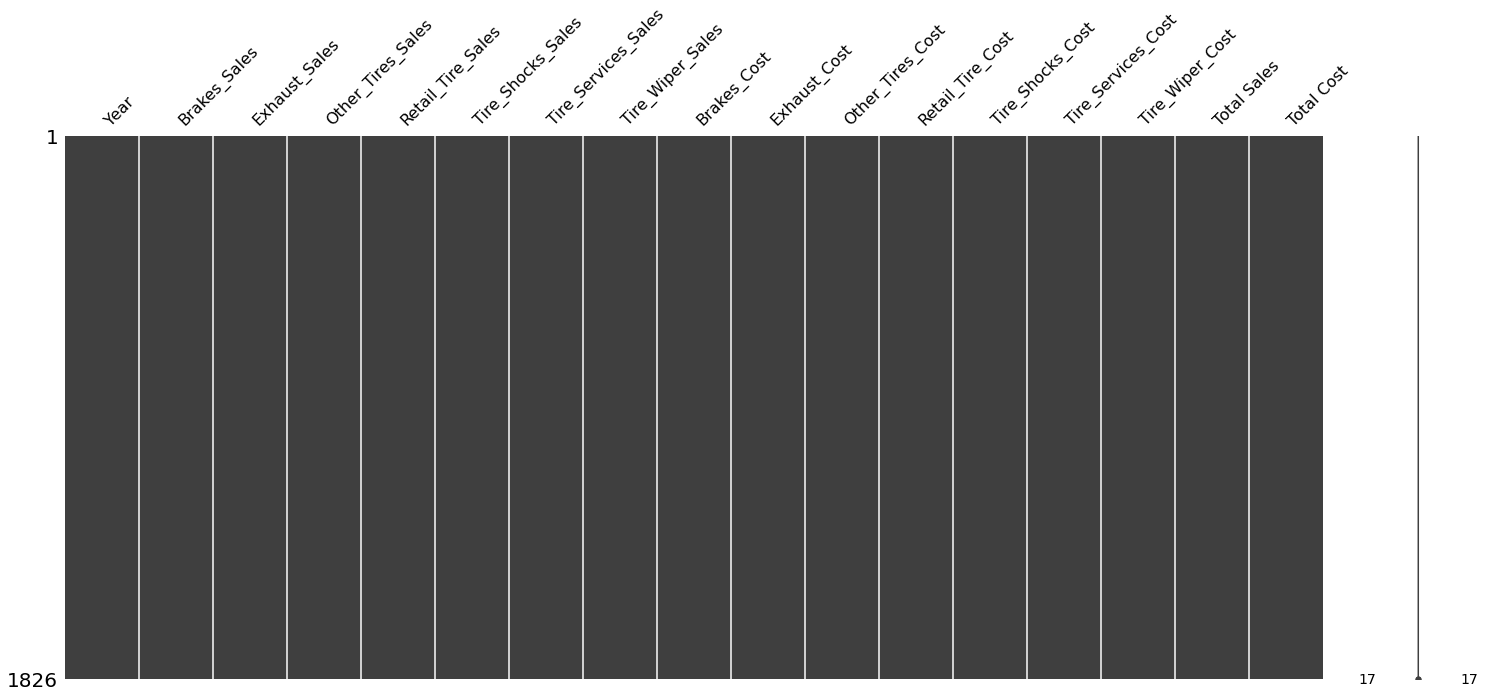

In [35]:
#Nulos y outliers
import missingno as msno
msno.matrix(df_)

In [36]:
def missing_zero_values_table(df):

        zero_val = (df == 0.00).astype(int).sum(axis=0)

        mis_val = df.isnull().sum()

        mis_val_percent = 100 * df.isnull().sum() / len(df)

        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)

        mz_table = mz_table.rename(

        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})

        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']

        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)

        mz_table['Data Type'] = df.dtypes

        mz_table = mz_table[

            mz_table.iloc[:,1] != 0].sort_values(

        '% of Total Values', ascending=False).round(1)

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      

            "There are " + str(mz_table.shape[0]) +

              " columns that have missing values.")

        return mz_table
    
missing_zero_values_table(df_)

Your selected dataframe has 17 columns and 1826 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [37]:
df_.columns

Index(['Year', 'Brakes_Sales', 'Exhaust_Sales', 'Other_Tires_Sales',
       'Retail_Tire_Sales', 'Tire_Shocks_Sales', 'Tire_Services_Sales',
       'Tire_Wiper_Sales', 'Brakes_Cost', 'Exhaust_Cost', 'Other_Tires_Cost',
       'Retail_Tire_Cost', 'Tire_Shocks_Cost', 'Tire_Services_Cost',
       'Tire_Wiper_Cost', 'Total Sales', 'Total Cost'],
      dtype='object')

In [38]:
v_disc = ["Year"]
target = ["Total Sales"]
v_cont = [c for c in df_.columns if c not in v_disc+target]

In [39]:
#Tratamiento de atipicos
# Se utilizará isolation Forest
from sklearn.ensemble import IsolationForest

# Seleccionamos el conjunto de datos
df_iso=df_[v_cont]

# Entrenamos el modelo
max_features=df_iso.shape[1]
n_estimators=50
max_samples='auto'
contamination=float(0.2)
model=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
model.fit(df_iso)

# Predecimos si es Outlier o no
df_iso["outlier"]=model.predict(df_iso)
# Vemos la proporción
df_iso["outlier"].value_counts()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



 1    1461
-1     365
Name: outlier, dtype: int64

In [40]:
len(df_iso.loc[df_iso["outlier"]==-1])/len(df_)

0.19989047097480833

In [41]:
indice_outliers = list(df_iso.loc[df_iso["outlier"]==-1].index)
df_.drop(indice_outliers,axis=0,inplace=True,errors="ignore")

In [42]:
df_.shape[0]

1461

In [43]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import plot,iplot
import cufflinks as cf
pd.options.plotting.backend = "plotly"
cf.go_offline()
#Veamos las correlaciones entre variables conyinuas
df_[[x for x in v_cont]].corr(method="spearman").iplot(kind="heatmap",colorscale="orrd",title="Correlation Matrix")

In [44]:
#De las correlaciones obtenidas con el target sacamos su valor absoluto
correlacion_target=df[v_cont+target].corr(method="spearman")
correlacion_target=abs(correlacion_target)

In [46]:
correlacion_target[target].sort_values(by =target,ascending = False).style.background_gradient()

,Total Sales
Total Sales,1.000000
Total Cost,0.918065
Other_Tires_Sales,0.899862
Other_Tires_Cost,0.851261
Brakes_Sales,0.841862
Brakes_Cost,0.780082
Tire_Shocks_Sales,0.686292
Tire_Shocks_Cost,0.660434
Tire_Wiper_Sales,0.603076
Exhaust_Sales,0.573396


In [48]:
#Variables de modelo
X=df_[v_cont+v_disc] #Variables predictoras
y=df_[target] #Variable objetivo

In [49]:
#Dividimos nuestros datos en conjunto de prueba y conjunto de entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15, random_state = 0)

In [50]:
X_train.shape[1]

16

In [51]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
kb = SelectKBest(k = 12, score_func=f_regression) #De las 16 variables solo vamos a seleccionar las 12 mejores

In [52]:
kb.fit(X_train, y_train) #Cargamos la instancia

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SelectKBest(k=12, score_func=<function f_regression at 0x16cdc8700>)

In [53]:
ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y] #Creamos la lista con las mejores variables

In [54]:
ls_best

['Brakes_Sales',
 'Exhaust_Sales',
 'Other_Tires_Sales',
 'Retail_Tire_Sales',
 'Tire_Shocks_Sales',
 'Tire_Services_Sales',
 'Brakes_Cost',
 'Exhaust_Cost',
 'Other_Tires_Cost',
 'Retail_Tire_Cost',
 'Tire_Shocks_Cost',
 'Total Cost']

In [55]:
X_train=X_train[ls_best] #Quitamos las columnas inecesarias en los subconjunto de entrenamiento y prueba
X_test=X_test[ls_best]

In [56]:
from sklearn.linear_model import LogisticRegression, LinearRegression
linreg = LinearRegression() #Creamos la instancia

In [57]:
linreg.fit(X_train, y_train) #Entrenamos el modelo

LinearRegression()

In [58]:
linreg.predict(X_test) #Predecimos los valores

array([[2084.71055697],
       [ 611.98211641],
       [2199.23558062],
       [2873.8831706 ],
       [3003.56064556],
       [2829.88216126],
       [2955.92269876],
       [2861.39604372],
       [2330.90799123],
       [4114.26740957],
       [2489.68374422],
       [3905.47473421],
       [2734.31209181],
       [2165.61800961],
       [3009.88653283],
       [3017.39184874],
       [3040.7351858 ],
       [2608.19364618],
       [4230.62172512],
       [2389.59054276],
       [2906.69052781],
       [3003.67018684],
       [4494.88282412],
       [2404.5643325 ],
       [3014.26275245],
       [2307.60279108],
       [2826.15056053],
       [2787.30465665],
       [3084.90093462],
       [3038.86818331],
       [3019.06497748],
       [3265.08399036],
       [2468.98487806],
       [2927.60719073],
       [3002.11072129],
       [1878.26248779],
       [3786.08874966],
       [2212.94936272],
       [2528.91018688],
       [3335.31680521],
       [2815.44489089],
       [3663.691

In [59]:
predicciones=y_test.copy()
predicciones['linreg']=linreg.predict(X_test)
predicciones.reset_index(drop=True,inplace=True)
predicciones #Comparamos los valores relaes con los estimados

,Total Sales,linreg
0,2085.854568,2084.710557
1,611.143505,611.982116
2,2200.353606,2199.235581
3,2874.478248,2873.883171
4,3004.069186,3003.560646
...,...,...
215,2533.276803,2530.182604
216,4555.849823,4556.300752
217,2007.106399,2006.651677
218,3605.470933,3605.975749


In [60]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def metricas(y_true,y_pred):
    r2=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    print(f'El r2 score es {r2}') #Obtenemos las metricas
    print(f'El error cuadrático medio es {mse}')
    print(f'El error medio absoluto es {mae}')

In [61]:
metricas(y_test,linreg.predict(X_test))

El r2 score es 0.9999879742422403
El error cuadrático medio es 6.888585201559698
El error medio absoluto es 1.9769942250977564


In [64]:
from matplotlib import pyplot as plt
predicciones.plot(title="Linear Regresion")

# Random Forest

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Definir el modelo de Random Forest
rf_model = RandomForestRegressor()

# Definir la cuadrícula de hiperparámetros a explorar
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda de cuadrícula
grid_search =RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)


# Realizar la búsqueda de cuadrícula en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)



/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [70]:
best_rf_model = grid_search.best_estimator_

In [71]:
predictions = best_rf_model.predict(X_test)

In [72]:
metricas(y_test,predictions)

El r2 score es 0.970354315259124
El error cuadrático medio es 16981.618063149846
El error medio absoluto es 82.32241786899027
